In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler, normalize
import matplotlib.colors
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [36]:
pd.options.mode.chained_assignment = None

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
FOLDER_PATH = "/content/drive/MyDrive/eq.csv"

In [39]:
missing_values = ["N/a","na","nan","NaN",'#VALUE!',' ','nan',np.nan]

In [40]:
df = pd.read_csv(FOLDER_PATH,encoding='Windows-1252',low_memory=False,na_values = missing_values)
df

,Earthquake Engineering Research Centre,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,International Institute of Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Gachibowli, Hyderabad - 500 032 India",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INDIAN EARTHQUAKES CATALOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PERIOD : 2474 BC - 2015 AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52994,52970,2019,7,28,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.074275362,2.323765786,2.915005247,32.8°N,78.4°E,10,NaN,NaN,NaN,Jammu & Kashmir,NaN
52995,52971,2019,7,28,10:44:10,16:14:10,3.6,3.6,NaN,3.436594203,2.783008037,3.334732424,25.5°N,90.4°E,70,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52996,52972,2019,7,28,21:25:06,7/29/2019 2:55,4,4,NaN,3.798913043,3.242250287,3.754459601,23.2°N,86.5°E,22,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52997,52973,2019,7,29,3:33:53,9:03:53,4.3,4.3,NaN,4.070652174,3.586681975,4.069254984,32.8°N,76.4°E,20,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


In [41]:
df = df.iloc[10:]

In [42]:
headers_ =['SI. No.','YEAR','MONTH','DATE','ORIGIN TIME(UTC)','IST','MAGNITUDE(Mw)','MAGNITUDE(MW)','MAGNITUDE(Mb1)','MAGNITUDE(Mb)',
           'MAGNITUDE(Ms)','MAGNITUDE(ML)','LAT','LONG','DEPTH(km)','INTENSITY(MM)','INTENSITY(MMI)','INTENSITY(MME)','LOCATION',
           'REFERENCE']

In [43]:
df.columns = headers_
df.head(5)

,SI. No.,YEAR,MONTH,DATE,ORIGIN TIME(UTC),IST,MAGNITUDE(Mw),MAGNITUDE(MW),MAGNITUDE(Mb1),MAGNITUDE(Mb),MAGNITUDE(Ms),MAGNITUDE(ML),LAT,LONG,DEPTH(km),INTENSITY(MM),INTENSITY(MMI),INTENSITY(MME),LOCATION,REFERENCE
10,1,-2474,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
11,2,-325,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
12,3,25,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0,NaN,NaN,NaN,NaN,Dr STGR
13,4,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
14,5,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,6.075520196,5.999685205,26,97,80,NaN,NaN,NaN,Myanmar,G-R


In [44]:
newdf = df

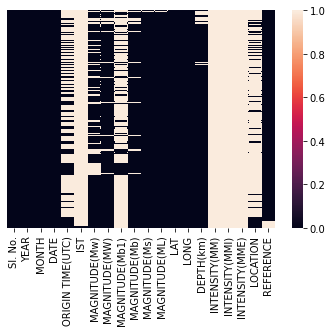

In [45]:
sns.heatmap(newdf.isnull(),yticklabels = False)

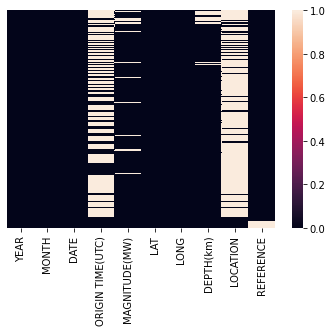

In [46]:
newdf.drop('IST', axis=1, inplace=True)
newdf.drop('INTENSITY(MM)', axis=1, inplace=True)
newdf.drop('INTENSITY(MMI)', axis=1, inplace=True)
newdf.drop('INTENSITY(MME)',axis=1, inplace=True)
newdf.drop('MAGNITUDE(Ms)', axis=1, inplace=True)
newdf.drop('MAGNITUDE(Mb)', axis=1, inplace=True)
newdf.drop('MAGNITUDE(ML)',axis=1, inplace=True)
newdf.drop('MAGNITUDE(Mw)', axis=1, inplace=True)
newdf.drop('MAGNITUDE(Mb1)', axis=1, inplace=True)
newdf.drop('SI. No.', axis=1, inplace=True)
sns.heatmap(newdf.isnull(),yticklabels = False)


In [47]:
ndf= newdf

In [48]:
a = ndf['ORIGIN TIME(UTC)'].isnull().sum()
b ,c = ndf.shape

print("% of data have null value \n")
print((a/b)*100)

% of data have null value 

60.01811696767254


In [49]:
ndf.drop('ORIGIN TIME(UTC)',axis=1, inplace=True)

In [50]:
a = ndf['LOCATION'].isnull().sum()
b ,c = ndf.shape

print("% of data have null value \n")
print((a/b)*100)

% of data have null value 

82.30953594142181


In [52]:
ndf.drop('LOCATION',axis=1, inplace=True)

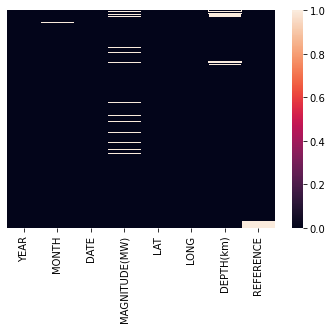

In [53]:
sns.heatmap(ndf.isnull(),yticklabels = False)

In [54]:
ndf.drop(ndf[ndf['YEAR'].astype(int) < 1000].index, inplace = True)

In [55]:
ndf.shape

(52975, 8)

In [56]:
ndf.drop(ndf[ndf['MONTH'].astype(float) <= 0].index, inplace = True)
ndf.drop(ndf[ndf['MONTH'].astype(float) > 12].index, inplace = True)

In [57]:
ndf.drop(ndf[ndf['DATE'].astype(float) <= 0].index, inplace = True)
ndf.drop(ndf[ndf['DATE'].astype(float) > 31].index, inplace = True)

In [58]:
ndf.shape

(52946, 8)

In [60]:
ndf['DEPTH(km)'].isnull().sum()

2176

In [62]:
ndf['DEPTH(km)']=ndf['DEPTH(km)'].astype(float)
ndf['DEPTH(km)'] = ndf['DEPTH(km)'].fillna(ndf['DEPTH(km)'].mean())
ndf['DEPTH(km)'].isnull().sum()

0

In [63]:
ndf["REFERENCE"] = df["REFERENCE"].astype("category")
ndf['REFERENCE'] = ndf['REFERENCE'].cat.codes

In [64]:
column1 = ['YEAR','MONTH','DATE']
for c in column1:
  ndf[c]=ndf[c].astype(float)

In [66]:
ndf.isnull().sum()

YEAR                0
MONTH              20
DATE               57
MAGNITUDE(MW)    2507
LAT                 0
LONG                0
DEPTH(km)           0
REFERENCE           0
dtype: int64

In [72]:
ndf = ndf.dropna()
ndf.shape

(50426, 8)

In [73]:
ndf.select_dtypes(['object']).columns 

Index(['MAGNITUDE(MW)', 'LAT', 'LONG'], dtype='object')

In [74]:
ndf['MAGNITUDE(MW)']=ndf['MAGNITUDE(MW)'].astype(float)
ndf['MAGNITUDE(MW)'] = ndf['MAGNITUDE(MW)'].fillna(ndf['MAGNITUDE(MW)'].mean())
ndf['MAGNITUDE(MW)'].isnull().sum()

0

In [75]:
def to_float(value):
  try:
    return float(value)
  except:
    return np.nan

def correct_LATandLONG( X ) :
  if str(X)[-1] == '-' :
    X = -1 * to_float(str(X)[:-1])
    return X
  else :
    return to_float(str(X))

In [76]:
ndf['LAT'].unique()

array(['62.200', '61.700', '90.200', ..., '12.1°N', '20.0°N', '31.8°N'],
      dtype=object)

In [77]:
ndf['LONG'].unique()

array(['034.40', '034.90', '030.00', ..., '73.0°E', '86.5°E', '72.8°E'],
      dtype=object)

In [78]:
ndf['LAT'] = ndf['LAT'].replace({'-':'',',':'', ' ':'', 'N':'','°':'','\?':'','S':'-'}, regex=True)
ndf['LONG'] = ndf['LONG'].replace({'-':'',',':'' ,' ':'', 'E': '','°':'','\?':'','S':'','W':'-'}, regex=True)

In [79]:
ndf['LAT']=ndf['LAT'].apply(correct_LATandLONG)

In [83]:
ndf['LONG']=ndf['LONG'].apply(correct_LATandLONG)

In [84]:
ndf.isnull().sum()

YEAR             0
MONTH            0
DATE             0
MAGNITUDE(MW)    0
LAT              0
LONG             0
DEPTH(km)        0
REFERENCE        0
dtype: int64

In [85]:
ndf.select_dtypes(['object']).columns 

Index([], dtype='object')

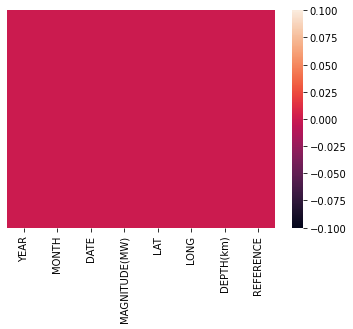

In [86]:
sns.heatmap(ndf.isnull(),yticklabels = False)

In [87]:
threshold = 4.1  ##[4,5]

In [88]:
label=[]
for x in ndf['MAGNITUDE(MW)']:
  if float(x) > threshold:
    label.append(1)
  else:
    label.append(0)

np.array(label)

array([1, 1, 1, ..., 0, 1, 0])

In [89]:
ndf.drop('MAGNITUDE(MW)', axis=1, inplace=True)

In [90]:
ndf.head()

,YEAR,MONTH,DATE,LAT,LONG,DEPTH(km),REFERENCE
27,1102.0,2.0,28.0,62.2,34.4,0.0,8
30,1364.0,2.0,10.0,61.7,34.9,0.0,8
31,1411.0,9.0,29.0,90.2,30.0,0.0,8
34,1504.0,6.0,1.0,69.0,34.5,0.0,8
35,1505.0,7.0,6.0,69.0,34.0,0.0,8


In [93]:
ndf['REFERENCE'].unique()

array([ 8, 26, 29, 10, 12, 34,  9,  3, 23, 20,  2, 35, 17, 22,  5, 19,  6,
        7, 31, 11, 24, 37,  1, 30,  4, 25, 33, 16, 14, 13, 28, 18, 32,  0,
       15, 21, 27, -1], dtype=int8)

In [94]:
scaler = MinMaxScaler()
X = scaler.fit_transform(ndf)
X.shape

(50426, 7)

In [104]:
X

array([[0.        , 0.09090909, 0.9       , ..., 0.02300197, 0.        ,
        0.23684211],
       [0.28571429, 0.09090909, 0.3       , ..., 0.02305568, 0.        ,
        0.23684211],
       [0.33696838, 0.72727273, 0.93333333, ..., 0.02252925, 0.        ,
        0.23684211],
       ...,
       [1.        , 0.54545455, 0.9       , ..., 0.02859936, 0.02646776,
        0.        ],
       [1.        , 0.54545455, 0.93333333, ..., 0.02751426, 0.0240616 ,
        0.        ],
       [1.        , 0.54545455, 1.        , ..., 0.02712749, 0.0120308 ,
        0.        ]])

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# KNN Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

mean_acc = np.zeros(40)
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, y_pred)
mean_acc

array([0.71809312, 0.64226224, 0.75069406, 0.71674467, 0.77520425,
       0.75204252, 0.78392956, 0.76941382, 0.78797493, 0.7806774 ,
       0.79154438, 0.78726105, 0.79384469, 0.78908543, 0.79670025,
       0.7931308 , 0.79836599, 0.79670025, 0.79971444, 0.79741414,
       0.79947648, 0.79868327, 0.80042833, 0.79852463, 0.80082494,
       0.79963512, 0.80082494, 0.79987309, 0.80034901, 0.80114222,
       0.80161815, 0.80114222, 0.80145951, 0.80177679, 0.80138019,
       0.80138019, 0.80130086, 0.80114222, 0.80145951, 0.80138019])

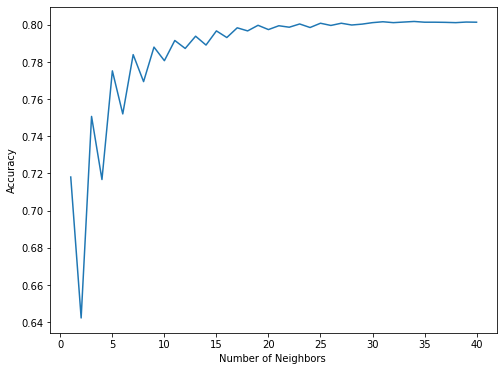

In [98]:
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (8, 6))
plt.plot(range(1,41), mean_acc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [101]:
knn = KNeighborsClassifier(n_neighbors = 23).fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred)

0.800428333465535

In [103]:
knn = KNeighborsClassifier()
k = list(range(1, 30))
param_grid = dict(n_neighbors=k)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search=grid.fit(X_train, y_train)

In [105]:
print(grid_search.best_params_)

{'n_neighbors': 27}


In [111]:
knn = KNeighborsClassifier(n_neighbors = 27).fit(X_train,y_train)
y_pred = knn.predict(X_test)

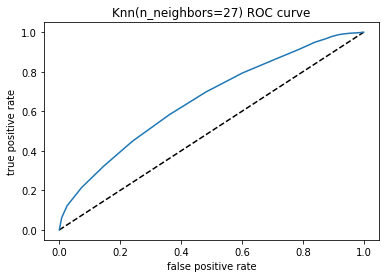

In [112]:
from sklearn.metrics import roc_curve

y_pred_ = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)


plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Knn(n_neighbors=27) ROC curve')
plt.show()


In [113]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_)

0.659463060735892

# DECISION TREE

In [114]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7307051637978901


In [115]:
max_depth=[]
acc_gini=[]
acc_entropy=[]
roc_score_gini = []
roc_score_gini = []
for i in range(1,20):
    clf=DecisionTreeClassifier(criterion='gini',max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc_gini.append(accuracy_score(y_test,y_pred))
    
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    acc_entropy.append(accuracy_score(y_test,y_pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})

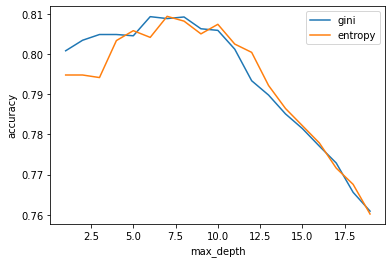

In [116]:
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [119]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range(2,15)}

clf = DecisionTreeClassifier(criterion='gini',random_state = 42)
tree = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
grid_search =tree.fit(X_train, y_train)

In [120]:
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8088363607519632


In [122]:
print(grid_search.best_params_)

{'max_depth': 7}


In [124]:
clf = DecisionTreeClassifier(criterion='entropy',random_state = 42)
tree = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
grid_search =tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8081224716427382


In [125]:
print(grid_search.best_params_)

{'max_depth': 8}


In [130]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state = 42)
clf.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8081224716427382


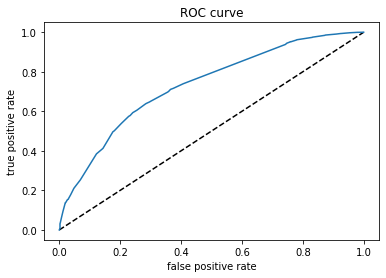

In [131]:
from sklearn.metrics import roc_curve

y_pred_ = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [132]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_)

0.7318740177164033

# Ensemble Learning 

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [134]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [136]:
parameters ={'max_depth': [5, 15, 35],
  'max_leaf_nodes':[8,16],
 'n_estimators': [100, 200, 400]}

In [137]:
forest = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8048703101451574


In [139]:
print(forest.best_params_)

{'max_depth': 15, 'max_leaf_nodes': 16, 'n_estimators': 200}


In [140]:
from sklearn.ensemble import AdaBoostClassifier
acc_ =[]
n_estim=[5,10,20,40,100]
for n in n_estim:
  ada_clf = AdaBoostClassifier(
    RandomForestClassifier(n_estimators=200, max_leaf_nodes=16,max_depth=15 ,random_state=42), n_estimators=n,
    learning_rate=0.5, random_state=42)
  ada_clf.fit(X_train, y_train)
  y_pred=ada_clf.predict(X_test)
  acc_.append(accuracy_score(y_test,y_pred))

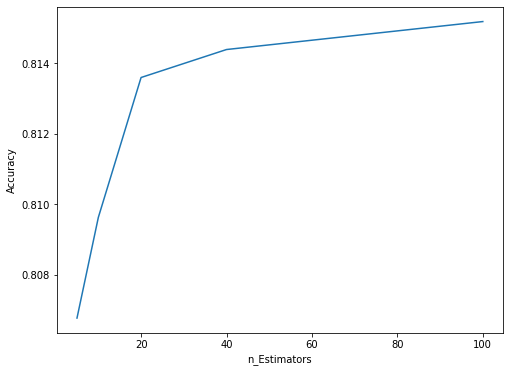

In [142]:
plt.figure(figsize = (8, 6))
plt.plot(n_estim, acc_)
plt.xlabel('n_Estimators')
plt.ylabel('Accuracy')
plt.show()

In [143]:
acc_ =[]
lr_rate =[0.1,0.2,0.3,0.5]
for n in lr_rate:
  ada_clf = AdaBoostClassifier(
    RandomForestClassifier(n_estimators=200, max_leaf_nodes=16,max_depth=15 ,random_state=42), n_estimators=200,
    learning_rate=n, random_state=42)
  ada_clf.fit(X_train, y_train)
  y_pred=ada_clf.predict(X_test)
  acc_.append(accuracy_score(y_test,y_pred))

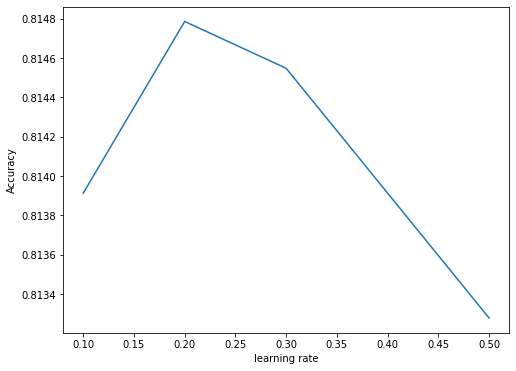

In [144]:
plt.figure(figsize = (8, 6))
plt.plot(lr_rate, acc_)
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.show()

In [145]:
ada_clf = AdaBoostClassifier(
  RandomForestClassifier(n_estimators=200, max_leaf_nodes=16,max_depth=15 ,random_state=42), n_estimators=200,
    learning_rate=0.2, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred=ada_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8147854366621718

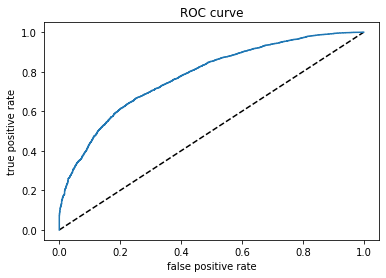

In [146]:
y_pred_ = ada_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [147]:
roc_auc_score(y_test,y_pred_)

0.7780120663196222